### Centralised Logistic Regression - Giorgio Polla

Logistic Regression Classifier implementation.   
Centralised version, without cross-validation.

In [3]:
import math
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
def read_file(filename):
    read_data = pd.read_csv(filename, header=None)
    return read_data

In [5]:
df = read_file("../data/spam.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
def get_x(df):
    return df.iloc[:, 0:-1].values

def get_y(df):
    return df.iloc[:, -1].values

def standardize(df):
    x = get_x(df)
    df_y = df.iloc[:, -1]
    
    standard_scaler = preprocessing.StandardScaler()
    x_scaled = standard_scaler.fit_transform(x)
    
    df_x = pd.DataFrame(x_scaled)
    df_scaled = df_x.join(df_y)
    return df_scaled

In [7]:
df = standardize(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1


In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_probability(x, b, w):
    z = np.dot(x, w) + b
    return sigmoid(z)

def loss(p, y, w, lambda_reg):
    epsilon = 1e-10
    
    error_loss = -np.average(
        y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon)
    )
    reg_loss = lambda_reg * np.sum(np.square(w)) / (2 * y.size)
    
    return error_loss + reg_loss

In [62]:
def train(df, iterations=20, learning_rate=1, lambda_reg=1):
    x = get_x(df)
    y = get_y(df)
    
    b = 0
    w = np.zeros(x.shape[1])
    
    loss_history = [[],[]]
    
    for it in range(iterations):
        pred = predict_probability(x, b, w)
        
        gradient_w = np.dot(x.T, (pred - y))
        gradient_b = np.average(pred - y)
        regularization = lambda_reg * w
        
        b -= learning_rate * gradient_b
        w -= learning_rate * (gradient_w + regularization) / y.size
            
        if it % (iterations / 5) == 0:
            print("It. %4d\t|\tLoss: %0.4f" %  (it, loss(pred, y, w, lambda_reg)))
        
        if it % 10 == 0 or it == iterations - 1:
            temp_loss = loss(pred, y, w, lambda_reg)
            loss_history[0].append(temp_loss)
            loss_history[1].append(it)
        
    return b, w, loss_history

It.    0	|	Loss: 0.6932
It.    4	|	Loss: 0.3232
It.    8	|	Loss: 0.2905
It.   12	|	Loss: 0.2754
It.   16	|	Loss: 0.2664


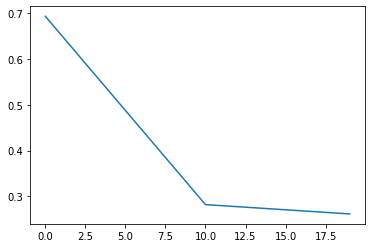

In [63]:
b, w, loss_history = train(df)

plt.plot(np.asarray(loss_history[1]), np.asarray(loss_history[0]))

In [51]:
def predict(x, b, w, threshold=0.5):
    prob = predict_probability(x, b, w)
    return prob >= threshold

def accuracy(df, b, w, threshold=0.5):
    x = get_x(df)
    y = get_y(df)
    pred = predict(x, b, w, threshold=threshold)
    
    accuracy = np.average(pred == y)
    print("Accuracy: %0.4f" % accuracy)
    
    return accuracy

In [52]:
accuracy(df, b, w, threshold=0.5)

Accuracy: 0.9141


0.9141490980221691

In [53]:
from sklearn.linear_model import LogisticRegression

x = get_x(df)
y = get_y(df)

lr_model = LogisticRegression(
    verbose=1, 
    max_iter=9, 
    solver='liblinear'
)
lr_model.fit(x, y)

print('Accuracy sklearn: {:.4f}'.format(lr_model.score(x, y)))

[LibLinear]Accuracy sklearn: 0.9302
